#### Steps to follow:

1.	Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)
2.	Understanding the attributes - Find the relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (5 points)
3.	Use PCA from scikit learn and elbow plot to find out a reduced number of dimension (which covers more than 95% of the variance) - 10 points
4.	Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyperparameters and do cross-validation to find the accuracy. (10 points)



In [1]:
#import libraries 

# to handle data in form of rows and column 
import pandas as pd
# numerical libraries
import numpy as np
#ploting libraries
import matplotlib.pyplot as plt
# seaborn for statistical plot 
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# reading csv file into pandas dataframe
Corgie_df=pd.read_csv("vehicle.csv")

### 1. Data pre-processing

In [4]:
# check top few records to get feel of data structure
Corgie_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [5]:
Corgie_df.shape

(846, 19)

In [6]:
Corgie_df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [7]:
Corgie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

- Total no of entries are 846. Some columns shows count less than 846 which means some missing values are present in respective columns.

In [8]:
Corgie_df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [9]:
# replace missing values with mean value of column
for column in Corgie_df.columns:
    Corgie_df.fillna(Corgie_df.mean()[0], inplace=True)

In [10]:
# sample of data to drop if any missing values are there
print("Total missing values in Corgie model vehicles database is = " + str(Corgie_df.isnull().sum().sum()))

Total missing values in Corgie model vehicles database is = 0


In [11]:
Corgie_df.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.000000,87.00,93.0,100.00,119.000000
circularity,846.0,45.117485,7.187621,33.000000,40.00,44.0,50.00,93.678487
distance_circularity,846.0,82.165147,15.760916,40.000000,70.00,80.0,98.00,112.000000
radius_ratio,846.0,168.354694,33.992719,93.678487,140.25,166.5,195.00,333.000000
pr.axis_aspect_ratio,846.0,61.754559,8.034032,47.000000,57.00,61.0,65.00,138.000000
max.length_aspect_ratio,846.0,8.567376,4.601217,2.000000,7.00,8.0,10.00,55.000000
scatter_ratio,846.0,168.812859,33.295782,93.678487,146.25,157.0,198.00,265.000000
elongatedness,846.0,40.996074,8.019282,26.000000,33.00,43.0,46.00,93.678487
pr.axis_rectangularity,846.0,20.841649,5.059793,17.000000,19.00,20.0,23.00,93.678487
max.length_rectangularity,846.0,147.998818,14.515652,118.000000,137.00,146.0,159.00,188.000000


### Boxplot

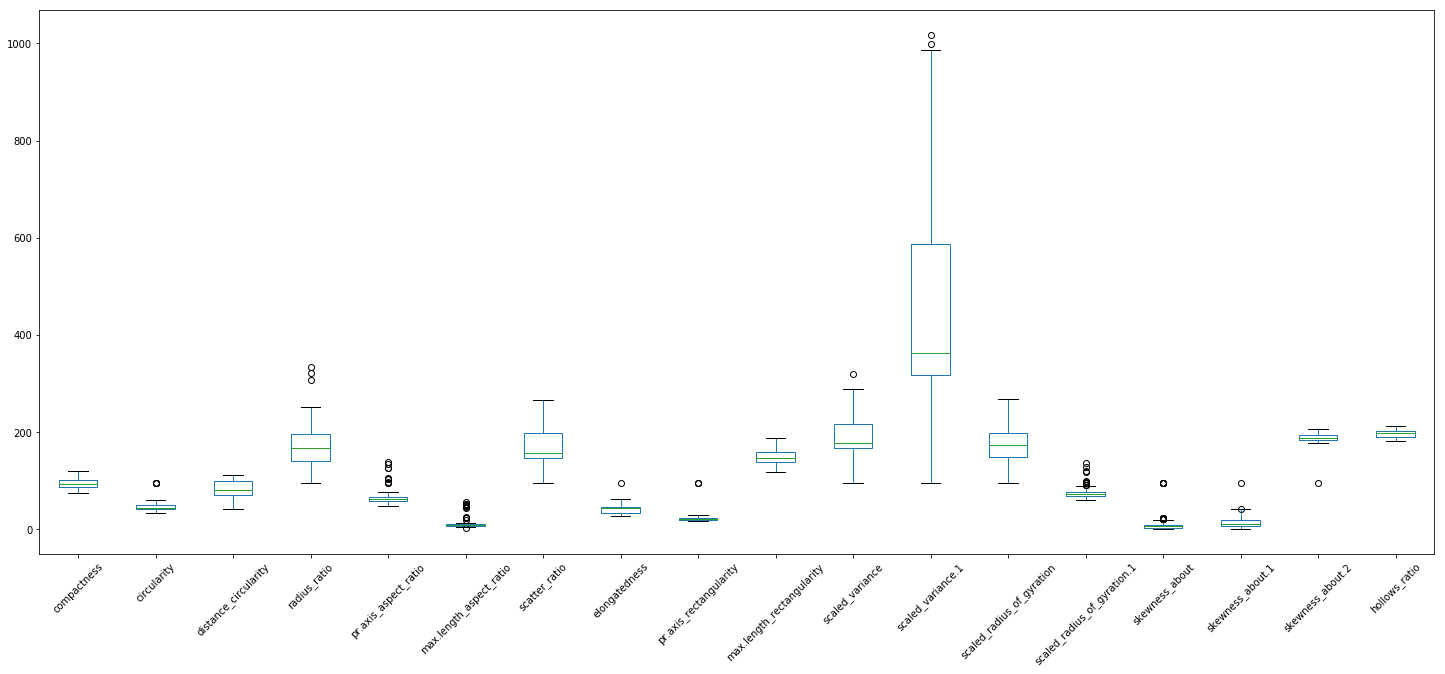

In [12]:
#Boxplot to understand spread and outliers
#Corgie_df.plot(kind='box', figsize=(30,20));
boxplot = Corgie_df.boxplot( grid=False, rot=45, fontsize=10,figsize=(25, 10));

In [14]:
"""
#Identify outliers and replace them by median
for col_name in Corgie_df.columns[:-1]:
    q1 = Corgie_df[col_name].quantile(0.25)
    q3 = Corgie_df[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    
    Corgie_df.loc[(Corgie_df[col_name] < low) | (Corgie_df[col_name] > high), col_name] = Corgie_df[col_name].median()
"""

'\n#Identify outliers and replace them by median\nfor col_name in Corgie_df.columns[:-1]:\n    q1 = Corgie_df[col_name].quantile(0.25)\n    q3 = Corgie_df[col_name].quantile(0.75)\n    iqr = q3 - q1\n    \n    low = q1-1.5*iqr\n    high = q3+1.5*iqr\n    \n    Corgie_df.loc[(Corgie_df[col_name] < low) | (Corgie_df[col_name] > high), col_name] = Corgie_df[col_name].median()\n'

### 2. Understanding the attributes

#### Relationship between different attributes

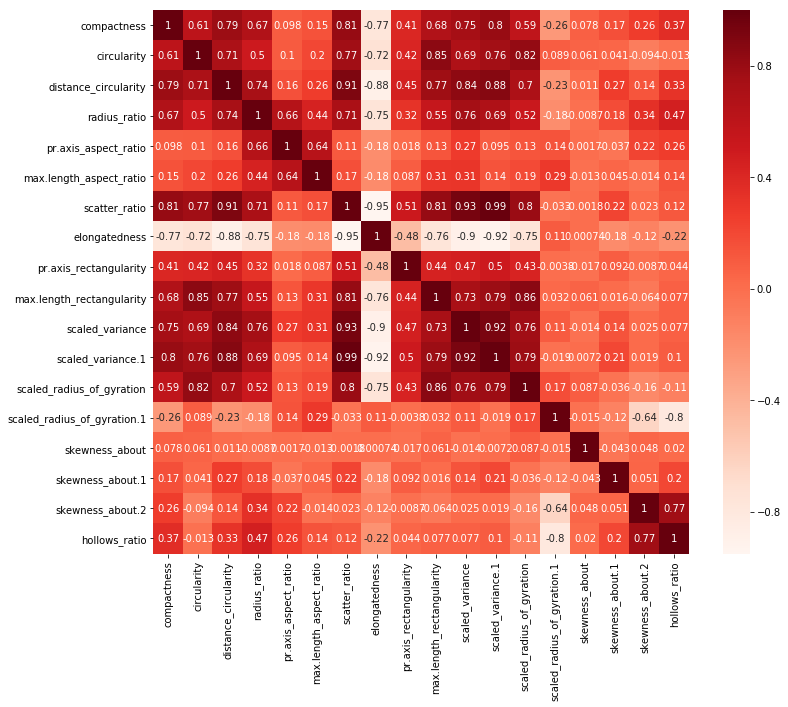

In [15]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = Corgie_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [16]:
# Create correlation matrix
corr_matrix = Corgie_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]


In [17]:
# Create correlation matrix
corr_matrix = Corgie_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_select = [column for column in upper.columns if any(upper[column] > 0.30) ]

In [18]:
to_select

['circularity',
 'distance_circularity',
 'radius_ratio',
 'pr.axis_aspect_ratio',
 'max.length_aspect_ratio',
 'scatter_ratio',
 'elongatedness',
 'pr.axis_rectangularity',
 'max.length_rectangularity',
 'scaled_variance',
 'scaled_variance.1',
 'scaled_radius_of_gyration',
 'skewness_about.2',
 'hollows_ratio']

In [19]:
df1 = Corgie_df.loc[:,(Corgie_df.columns.isin(to_select))]
df1.head()

,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,skewness_about.2,hollows_ratio
0,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,187.0,197
1,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,189.0,199
2,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,188.0,196
3,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,199.0,207
4,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,180.0,183


In [20]:
#df2 = Corgie_df.drop(Corgie_df.columns.isin(to_select))
df2 = Corgie_df[Corgie_df.columns.difference(to_select)]
df2=df2.drop(columns=['class'])
df2.head()


,compactness,scaled_radius_of_gyration.1,skewness_about,skewness_about.1
0,95,70.0,6.0,16.0
1,91,72.0,9.0,14.0
2,104,73.0,14.0,9.0
3,93,63.0,6.0,10.0
4,85,127.0,9.0,11.0


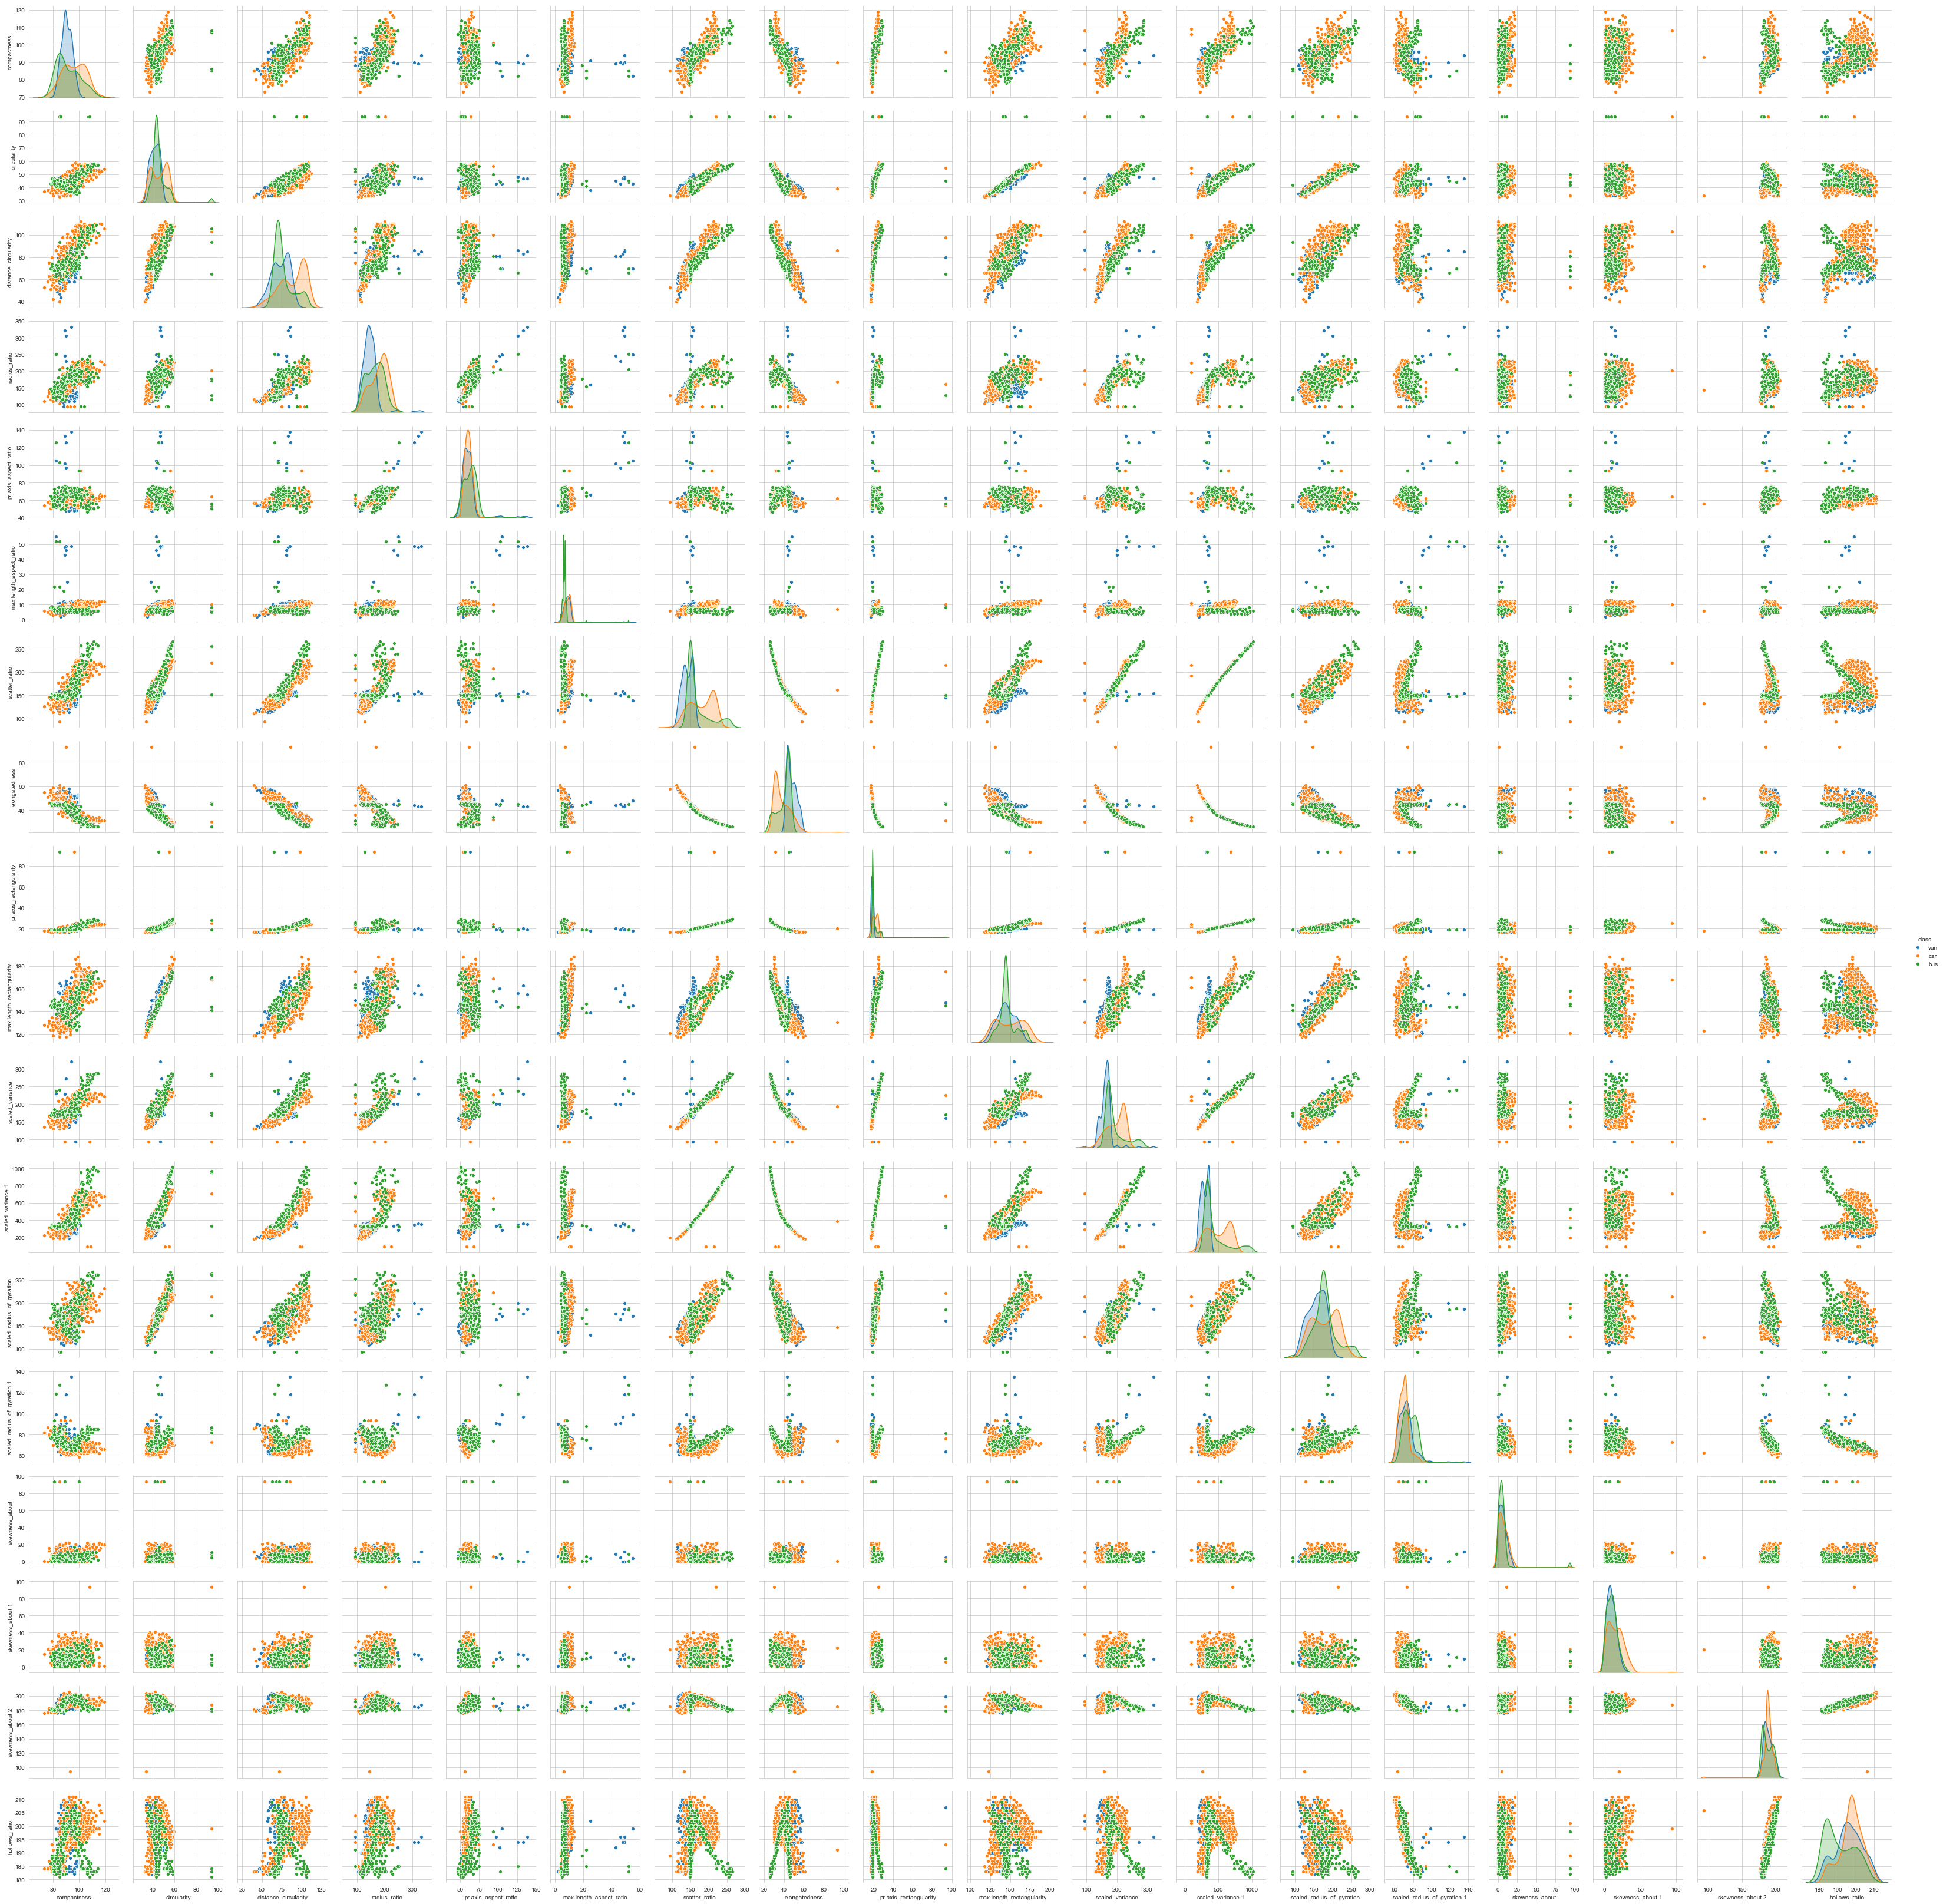

In [21]:
sns.set_style("whitegrid")
sns.pairplot(Corgie_df,diag_kind='kde',hue = 'class');

- 'pr.axis_rectangularity','max.length_rectangularity','scaled_variance.1' variables have less correlation. 
- elongatedness is negatively correlated with other variables.
- 'scatter_ratio','elongatedness','pr.axis_rectangularity','max.length_rectangularity', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration'variables are highly correlated. 
- PCA is a way to deal with highly correlated variables, so there is no need to remove them.
- If N variables are highly correlated than they will all load out on the SAME Principal Component (Eigenvector), not different ones. This is how you identify them as being highly correlated. 
- We are going to drop less correlated variables for PCA and join them before appling Support vector machines.

### Building PCA and SVM model by considering whole data as it is without dropping low correlated attributes

In [22]:
df=Corgie_df.drop(columns=['class'])

In [23]:
# split data table into data X and class labels y
X=Corgie_df.drop(columns=['class'])
y=Corgie_df['class']
# standardize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# PCA
# Step 1 - Create covariance matrix
X_std =  sc.fit_transform(X)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00118343e+00  6.10675306e-01  7.89553264e-01  6.75154059e-01
   9.78953238e-02  1.48424629e-01  8.13560549e-01 -7.72604790e-01
   4.08317944e-01  6.76943342e-01  7.46018771e-01  8.05428233e-01
   5.87424935e-01 -2.56055879e-01  7.83731070e-02  1.68274569e-01
   2.65170734e-01  3.65984455e-01]
 [ 6.10675306e-01  1.00118343e+00  7.09361789e-01  5.01848090e-01
   1.04433808e-01  2.00920264e-01  7.72256848e-01 -7.22485946e-01
   4.17892791e-01  8.50747256e-01  6.88521230e-01  7.57919415e-01
   8.20055851e-01  8.92305340e-02  6.11275337e-02  4.12773906e-02
  -9.46116966e-02 -1.34153427e-02]
 [ 7.89553264e-01  7.09361789e-01  1.00118343e+00  7.40798580e-01
   1.59436255e-01  2.63720121e-01  9.06552318e-01 -8.85714863e-01
   4.53156682e-01  7.75200752e-01  8.45383940e-01  8.78232452e-01
   7.02941702e-01 -2.27833425e-01  1.12754147e-02  2.65518558e-01
   1.36846325e-01  3.28497141e-01]
 [ 6.75154059e-01  5.01848090e-01  7.40798580e-01  1.00118343e+00
   6.55807424e-

In [25]:
# Step 2- Get eigen values and eigen vector
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-2.88945593e-01 -1.21992741e-01  1.21582804e-01 -5.38085382e-02
   2.23928205e-02  5.49906921e-02  7.02513804e-02  4.10040351e-01
   2.10390263e-01 -7.52761474e-01  1.68204793e-01 -1.91795741e-02
   6.45365291e-02  7.58992593e-02 -8.55149192e-02 -2.03995055e-01
  -9.37502937e-02  1.18552721e-02]
 [-2.79966956e-01  1.56990207e-01  5.38405091e-02 -1.40911429e-01
  -4.34518966e-02  8.05890122e-02 -3.54883214e-01 -3.99423125e-01
   2.30241184e-01 -2.05512300e-01 -6.49057005e-01 -7.79206682e-03
   1.89172223e-01  8.56508584e-02 -1.19541686e-02  1.35296522e-02
   1.98252704e-04 -1.42562091e-01]
 [-3.19689611e-01 -6.94594594e-02  6.75089578e-02  7.12522258e-02
   4.90237800e-02  7.39765870e-02 -1.06068111e-01  1.42651479e-01
  -2.34405681e-01  2.09401603e-01 -1.43597536e-01 -5.81917079e-02
   2.28211385e-01 -1.40495939e-01  1.56506297e-02 -4.60624373e-01
   3.69409626e-01  5.48050625e-01]
 [-2.76160156e-01 -1.98163872e-01 -2.71432453e-01  3.94849501e-02
  -1.15996234e-02  

In [26]:
# Step 3 : Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(8.46841380043895, array([-0.28894559, -0.27996696, -0.31968961, -0.27616016, -0.09059815,
       -0.10604756, -0.33245306,  0.32410475, -0.18489687, -0.29726891,
       -0.31923476, -0.32619978, -0.28476915,  0.02478536, -0.01040802,
       -0.06305772, -0.03782601, -0.08089534])), (2.830737036172715, array([-0.12199274,  0.15699021, -0.06945946, -0.19816387, -0.13215921,
        0.00438819,  0.05248643,  0.01067217,  0.062559  ,  0.12006477,
        0.07050329,  0.06058605,  0.21135336,  0.49509687, -0.00660344,
       -0.12445675, -0.5122525 , -0.54893246])), (1.867127122984728, array([ 0.1215828 ,  0.05384051,  0.06750896, -0.27143245, -0.6367431 ,
       -0.59337914,  0.10434176, -0.06756755,  0.11411646,  0.02036749,
       -0.05371982,  0.11585613,  0.02651722, -0.30087866,  0.02906011,
        0.09392094, -0.00379826, -0.02087034])), (1.1184838141156255, array([-0.05380854, -0.14091143,  0.07125223,  0.03948495, -0.03812811,
        0.06177092,  0.07106942, -0.03768246,  0.080

Cumulative Variance Explained [ 46.99113253  62.69886037  73.05952768  79.26598174  84.46978416
  88.41201406  91.57350028  93.69679338  95.45550318  96.71173501
  97.6173718   98.17520291  98.66776865  99.06056496  99.43703384
  99.72454201  99.95392785 100.        ]


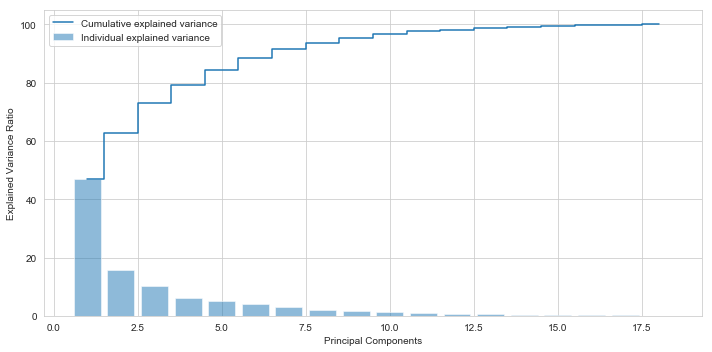

In [27]:
tot = sum(eigenvalues)
var_exp = [( i /tot ) * 100 for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eigenvalues.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eigenvalues.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

### Elbow Plot

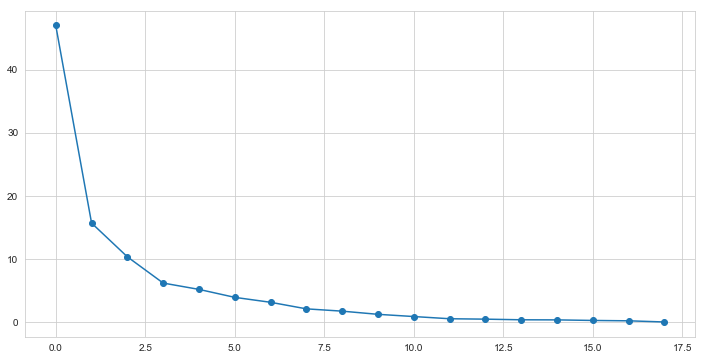

In [28]:
'''Plotting Elbow/ Scree Plot'''
plt.figure(figsize=(12,6))
plt.plot( var_exp, marker = "o" )

 By considering eigen vector corresponding to largest eigen value we can retain 49.5% variance, considering eigen vectors corresponding to top 4 eigen values we can retain 79.26 % variance. For data compression purpose, we generally go for 99% variance retention, while for visualization we make the dimension to 8 or 9. Now a reduction matrix of k eigen vectors corresponding to top k eigen values will be formed. Here, k is set to 9 which covers more than 95% of the variance. Then the n-dimensional feature space is transformed to k-dimensional feature subspace via reduction matrix.

In [29]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
data_reduced = pca.fit_transform(X_std)
data_reduced.transpose()

array([[ 3.72467559e-01, -1.48940629e+00,  3.56319775e+00, ...,
         4.50885911e+00, -3.04653376e+00, -4.48914174e+00],
       [-2.76237060e-01, -4.11819345e-01,  2.43702158e-01, ...,
        -1.01662439e-01, -1.07982779e+00,  2.23405256e-01],
       [ 9.45811392e-01, -3.11025894e-01,  2.22548538e-01, ...,
         4.45270576e-01, -4.84361256e-01, -6.29201788e-01],
       ...,
       [ 7.46478339e-01,  5.70285507e-01, -5.06415424e-01, ...,
         1.87976325e-01,  1.16504015e-01,  1.67183092e-01],
       [ 8.37568630e-01, -4.84223673e-01, -2.61443611e-01, ...,
        -4.86914014e-01,  1.72220460e-01,  1.70570418e-02],
       [ 3.64665039e-01, -4.30737236e-03,  4.50820979e-01, ...,
         5.60603450e-01,  2.71623974e-01, -6.96096383e-02]])

In [30]:
parameter_candidates = [
  {'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear']},
  {'C': [0.01, 0.05, 0.5, 1], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]


In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC
# Create a classifier object with the classifier and parameter candidates
clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)

# Train the classifier on data1's feature and target data
clf.fit(data_reduced, y)   

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear']}, {'C': [0.01, 0.05, 0.5, 1], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [32]:
# View the accuracy score
print('Best score for data1:', clf.best_score_) 

Best score for data1: 0.8747044917257684


In [33]:
# View the best parameters for the model found using grid search
print('Best C:',clf.best_estimator_.C) 
print('Best Kernel:',clf.best_estimator_.kernel)
print('Best Gamma:',clf.best_estimator_.gamma)

Best C: 0.5
Best Kernel: linear
Best Gamma: auto_deprecated


In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [35]:
# Build the k-fold cross-validator
kfold = KFold(n_splits=10, random_state=7)

In [36]:
result = cross_val_score(clf,data_reduced, y, cv=kfold, scoring='accuracy')
print(result.mean())

0.8711904761904762


### Now drop low correleted attributes and check model accuracy

### 3.Use PCA from scikit learn and elbow plot to find out a reduced number of dimension


In [37]:
# split data table into data X and class labels y
X1=df1
y1=Corgie_df['class']
# standardize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# PCA
# Step 1 - Create covariance matrix
X_std1 =  sc.fit_transform(X1)          
cov_matrix1 = np.cov(X_std1.T)
print('Covariance Matrix \n%s', cov_matrix1)

Covariance Matrix 
%s [[ 1.00118343  0.70936179  0.50184809  0.10443381  0.20092026  0.77225685
  -0.72248595  0.41789279  0.85074726  0.68852123  0.75791942  0.82005585
  -0.0946117  -0.01341534]
 [ 0.70936179  1.00118343  0.74079858  0.15943625  0.26372012  0.90655232
  -0.88571486  0.45315668  0.77520075  0.84538394  0.87823245  0.7029417
   0.13684632  0.32849714]
 [ 0.50184809  0.74079858  1.00118343  0.65580742  0.44352551  0.712936
  -0.74636019  0.32376953  0.55020436  0.75666142  0.68867276  0.52133469
   0.34213634  0.46564832]
 [ 0.10443381  0.15943625  0.65580742  1.00118343  0.63602738  0.11078286
  -0.18444827  0.01827542  0.134951    0.27004359  0.09469564  0.13503258
   0.22306196  0.26280451]
 [ 0.20092026  0.26372012  0.44352551  0.63602738  1.00118343  0.16715507
  -0.17823946  0.08758775  0.30630475  0.31481362  0.14129292  0.19118481
  -0.01410289  0.14408905]
 [ 0.77225685  0.90655232  0.712936    0.11078286  0.16715507  1.00118343
  -0.95112845  0.50993232  0.811

In [38]:
# Step 2- Get eigen values and eigen vector
eigenvalues1, eigenvectors1 = np.linalg.eig(cov_matrix1)
print('Eigen Vectors \n%s', eigenvectors1)
print('\n Eigen Values \n%s', eigenvalues1)

Eigen Vectors 
%s [[-2.96860753e-01  1.64265778e-01  3.78463891e-02  1.20316961e-01
  -4.39958102e-01 -2.90960578e-01 -7.65972501e-02  7.23255108e-01
   8.14482273e-03  8.28503512e-02 -3.38549715e-02 -1.92477037e-01
  -1.28803292e-01 -9.01508971e-03]
 [-3.30894511e-01 -4.33465897e-02 -1.24338364e-01  6.92177745e-02
  -3.64977668e-03  3.37497278e-01 -2.29322173e-01  1.98262963e-02
   6.54521597e-02 -4.00153699e-02 -1.74590191e-01 -2.97273931e-01
   7.18905860e-01 -2.44775237e-01]
 [-2.86266068e-01 -3.25362612e-01  9.29436384e-02  3.24743366e-02
   2.78267075e-01 -1.42255669e-01 -2.51105302e-01  3.60880539e-02
   6.85724931e-02  1.44515842e-01  7.18626064e-01 -1.08966067e-01
   7.66652784e-02  2.84096359e-01]
 [-1.00715104e-01 -4.23293235e-01  5.02393608e-01 -4.11963630e-02
   1.96410198e-01 -4.73074630e-01 -1.78869826e-01  3.38243983e-03
  -4.88732618e-02 -1.35800439e-01 -4.32463266e-01  1.68416260e-01
   1.04690954e-01 -1.22561565e-01]
 [-1.16975014e-01 -2.63412447e-01  6.02313882e-01 

In [39]:
# Step 3 : Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs1 = [(eigenvalues1[index], eigenvectors1[:,index]) for index in range(len(eigenvalues1))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs1.sort()

eig_pairs1.reverse()
print(eig_pairs1)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted1 = [eig_pairs1[index][0] for index in range(len(eigenvalues1))]
eigvectors_sorted1 = [eig_pairs1[index][1] for index in range(len(eigenvalues1))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted1)

[(7.761039345857746, array([-0.29686075, -0.33089451, -0.28626607, -0.1007151 , -0.11697501,
       -0.34621496,  0.33800858, -0.19479785, -0.31390639, -0.33512861,
       -0.33952641, -0.30450818, -0.02693726, -0.07049348])), (2.3125315668346524, array([ 0.16426578, -0.04334659, -0.32536261, -0.42329323, -0.26341245,
        0.08020997, -0.0018838 ,  0.09862404,  0.1159964 ,  0.02004822,
        0.09211205,  0.20072151, -0.50788292, -0.52912562])), (1.452277188443741, array([ 0.03784639, -0.12433836,  0.09294364,  0.50239361,  0.60231388,
       -0.10672258,  0.12375987, -0.11187806,  0.05386896,  0.04027424,
       -0.11568172,  0.09000415, -0.41620474, -0.34760835])), (0.7125758785076586, array([ 0.12031696,  0.06921777,  0.03247434, -0.04119636, -0.1259152 ,
        0.05877661, -0.07100502, -0.96345191,  0.0855543 ,  0.0377292 ,
        0.0583475 ,  0.11423776,  0.01365441, -0.00249054])), (0.5614571937391899, array([-0.4399581 , -0.00364978,  0.27826708,  0.1964102 , -0.29008393,


Cumulative Variance Explained [ 55.37046815  71.86902585  82.23017262  87.31398398  91.31965207
  94.31774544  96.0462038   97.29067774  97.99855933  98.62116102
  99.18576101  99.6072104   99.93792574 100.        ]


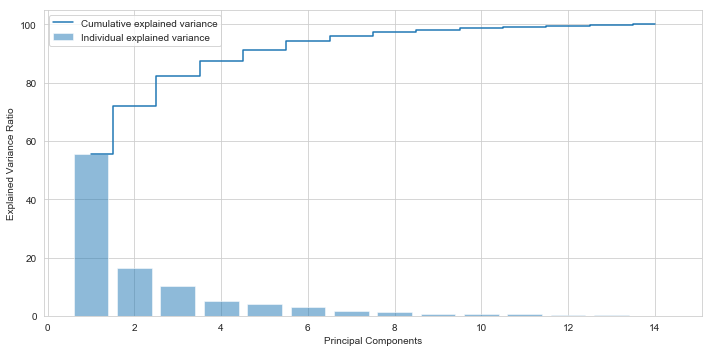

In [40]:
tot1 = sum(eigenvalues1)
var_exp1 = [( i /tot1 ) * 100 for i in sorted(eigenvalues1, reverse=True)]
cum_var_exp1 = np.cumsum(var_exp1)
print("Cumulative Variance Explained", cum_var_exp1)
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eigenvalues1.size + 1), var_exp1, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eigenvalues1.size + 1), cum_var_exp1, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

By considering eigen vector corresponding to largest eigen value we can retain 55.37% variance, considering eigen vectors corresponding to top 4 eigen values we can retain 87.37 % variance. For data compression purpose, we generally go for 99% variance retention, while for visualization we make the dimension to 5 or 6. Now a reduction matrix of k eigen vectors corresponding to top k eigen values will be formed. Here, k is set to 6 which covers approximately 95% of the variance. Then the n-dimensional feature space is transformed to k-dimensional feature subspace via reduction matrix

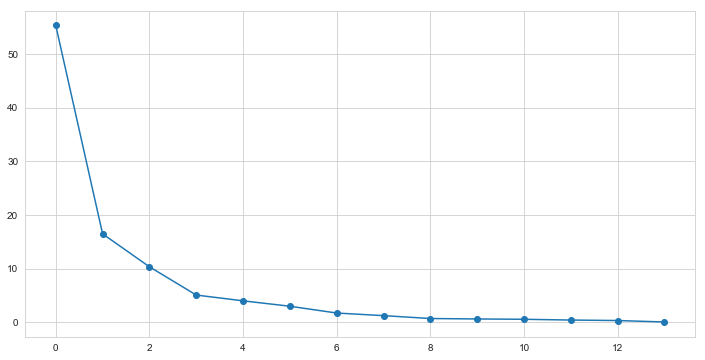

In [41]:
'''Plotting Elbow/ Scree Plot'''
plt.figure(figsize=(12,6))
plt.plot( var_exp1, marker = "o" )

In [42]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA
pca1 = PCA(n_components=6)
data_reduced1 = pca1.fit_transform(X_std1)
data_reduced1.transpose()

array([[ 3.25620686e-01, -1.48653955e+00,  3.37555124e+00, ...,
         4.32592841e+00, -3.02146392e+00, -4.40685690e+00],
       [ 5.42316725e-01,  1.58918325e-01, -2.38160512e-03, ...,
         3.46210609e-01,  3.39262228e-01, -6.65453852e-01],
       [ 1.05400881e+00, -3.70831660e-01,  2.01724667e-01, ...,
         2.76020155e-01, -3.41833001e-01, -1.36961885e-01],
       [-1.68516901e-01, -6.06159623e-02, -2.21932234e-01, ...,
         6.80048966e-02,  5.47380036e-02,  2.71531764e-02],
       [ 6.32904882e-01,  4.97155019e-01, -4.31278168e-01, ...,
         8.21787843e-02, -4.12582586e-01, -9.08061626e-02],
       [-6.96231603e-01,  7.41386592e-01, -2.13540842e-02, ...,
         2.59122855e-01,  3.65714374e-01,  1.58259807e-01]])

In [43]:
pca1.components_

array([[ 0.29686075,  0.33089451,  0.28626607,  0.1007151 ,  0.11697501,
         0.34621496, -0.33800858,  0.19479785,  0.31390639,  0.33512861,
         0.33952641,  0.30450818,  0.02693726,  0.07049348],
       [-0.16426578,  0.04334659,  0.32536261,  0.42329323,  0.26341245,
        -0.08020997,  0.0018838 , -0.09862404, -0.1159964 , -0.02004822,
        -0.09211205, -0.20072151,  0.50788292,  0.52912562],
       [ 0.03784639, -0.12433836,  0.09294364,  0.50239361,  0.60231388,
        -0.10672258,  0.12375987, -0.11187806,  0.05386896,  0.04027424,
        -0.11568172,  0.09000415, -0.41620474, -0.34760835],
       [-0.12031696, -0.06921777, -0.03247434,  0.04119636,  0.1259152 ,
        -0.05877661,  0.07100502,  0.96345191, -0.0855543 , -0.0377292 ,
        -0.0583475 , -0.11423776, -0.01365441,  0.00249054],
       [ 0.4399581 ,  0.00364978, -0.27826708, -0.1964102 ,  0.29008393,
        -0.18159301,  0.1972337 ,  0.03352428,  0.4780625 , -0.32855698,
        -0.21122171,  0.20

In [44]:
df_pca1 = pd.DataFrame(data_reduced1,columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
df_pca1

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.325621,0.542317,1.054009,-0.168517,0.632905,-0.696232
1,-1.486540,0.158918,-0.370832,-0.060616,0.497155,0.741387
2,3.375551,-0.002382,0.201725,-0.221932,-0.431278,-0.021354
3,-1.714895,2.160088,-0.954598,0.089371,0.707649,0.379207
4,1.405083,3.524023,9.906071,1.122215,0.415871,2.105462
5,7.225141,-4.639304,-0.501974,-0.677596,1.318757,-1.268963
6,-0.830514,1.681229,-1.002737,-0.237131,0.288096,-0.861842
7,-1.850261,1.162725,0.103274,-0.151847,0.900719,-0.497051
8,-4.140790,2.377667,-1.209348,0.172196,0.392227,0.188533
9,0.247235,0.606208,-1.006042,0.282638,0.531924,1.362305


In [45]:
df_SVM=df2.join(df_pca1)

In [46]:
df_SVM

,compactness,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,PC1,PC2,PC3,PC4,PC5,PC6
0,95,70.0,6.0,16.0,0.325621,0.542317,1.054009,-0.168517,0.632905,-0.696232
1,91,72.0,9.0,14.0,-1.486540,0.158918,-0.370832,-0.060616,0.497155,0.741387
2,104,73.0,14.0,9.0,3.375551,-0.002382,0.201725,-0.221932,-0.431278,-0.021354
3,93,63.0,6.0,10.0,-1.714895,2.160088,-0.954598,0.089371,0.707649,0.379207
4,85,127.0,9.0,11.0,1.405083,3.524023,9.906071,1.122215,0.415871,2.105462
5,107,85.0,5.0,9.0,7.225141,-4.639304,-0.501974,-0.677596,1.318757,-1.268963
6,97,66.0,13.0,1.0,-0.830514,1.681229,-1.002737,-0.237131,0.288096,-0.861842
7,90,67.0,3.0,3.0,-1.850261,1.162725,0.103274,-0.151847,0.900719,-0.497051
8,86,64.0,2.0,14.0,-4.140790,2.377667,-1.209348,0.172196,0.392227,0.188533
9,93,64.0,4.0,14.0,0.247235,0.606208,-1.006042,0.282638,0.531924,1.362305


### 4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyperparameters and do cross-validation to find the accuracy.


In [47]:
parameter_candidates = [
  {'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear']},
  {'C': [0.01, 0.05, 0.5, 1], 'kernel': ['rbf']},
]


In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC
# Create a classifier object with the classifier and parameter candidates
clf1 = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)

# Train the classifier on data1's feature and target data
clf1.fit(data_reduced1, y1)   

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear']}, {'C': [0.01, 0.05, 0.5, 1], 'kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [49]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [50]:
# Build the k-fold cross-validator
kfold = KFold(n_splits=10, random_state=10)

In [51]:
result1 = cross_val_score(clf1,data_reduced1, y1, cv=kfold, scoring='accuracy')
print(result1.mean())

0.925546218487395


### Best hyperparameters

In [52]:
# View the accuracy score
print('Best score for data1:', clf1.best_score_) 

Best score for data1: 0.91725768321513


In [53]:
# View the best parameters for the model found using grid search
print('Best C:',clf1.best_estimator_.C) 
print('Best Kernel:',clf1.best_estimator_.kernel)


Best C: 1
Best Kernel: rbf


#### - By dropping low correlated attributes accuracy Increase to 92.55% .
#### - Acccuracy of considering whole data(without dropping low correlated attributes is 87%.

#### - Feature reduction without dropping low correlated attributes is upto 9 components(which covers more than 95% of the variance).
#### - Feature reduction by dropping low correlated attributes is upto 6 components(which covers more than 95% of the variance).
